Dataset: https://finance.yahoo.com/quote/BRK-B/history?p=BRK-B

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from google.colab import files
import io

In [ ]:
data = pd.read_csv('data/BRK-B.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-11-14,157.479996,158.160004,156.529999,157.929993,157.929993,5520400
1,2016-11-15,157.610001,157.820007,156.089996,157.460007,157.460007,4780100
2,2016-11-16,157.020004,157.589996,156.020004,157.080002,157.080002,4468900
3,2016-11-17,156.809998,158.639999,156.300003,158.389999,158.389999,4169100
4,2016-11-18,158.350006,158.479996,157.169998,157.750000,157.750000,3383300


In [ ]:
print(len(data))

1259


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1259 non-null   object 
 1   Open       1259 non-null   float64
 2   High       1259 non-null   float64
 3   Low        1259 non-null   float64
 4   Close      1259 non-null   float64
 5   Adj Close  1259 non-null   float64
 6   Volume     1259 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 69.0+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,209.677998,211.032391,208.109833,209.605322,209.605322,4.489880e+06
std,33.804319,33.993990,33.654344,33.801263,33.801263,2.200567e+06
min,156.809998,157.589996,156.020004,156.970001,156.970001,6.720000e+04
25%,187.235001,188.105004,185.800003,187.190002,187.190002,3.191350e+06
50%,204.679993,205.850006,203.050003,204.570007,204.570007,3.919900e+06
75%,221.724999,223.000000,220.110001,221.345001,221.345001,5.038950e+06
max,292.910004,295.649994,292.070007,292.519989,292.519989,2.229380e+07


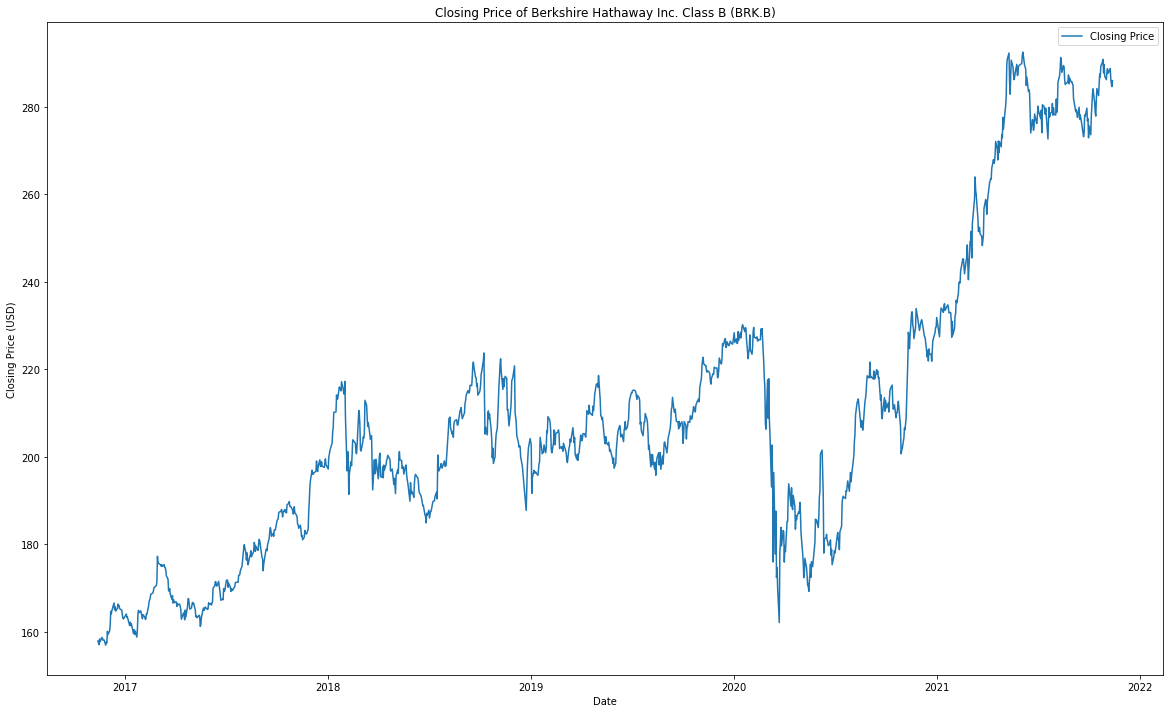

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
data['Date'] = pd.to_datetime(data.Date, format = '%Y-%m-%d')
data.index = data['Date']

plt.figure(figsize = (20,12))
plt.plot(data['Close'], label = 'Closing Price')
plt.title('Closing Price of Berkshire Hathaway Inc. Class B (BRK.B)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()
plt.savefig('1.png')
files.download('1.png')

In [ ]:
temp = {'Algorithm':[],
        'Performance':[]
       }
  
performance_scores = pd.DataFrame(temp)

# **Technique 1: Moving Average**

In [ ]:
temp = data.sort_index(ascending = True, axis = 0)
ma_data = pd.DataFrame(index = range(0, len(data)), columns = ['Date', 'Close'])

for i in range(0, len(temp)):
  ma_data['Date'][i] = temp['Date'][i]
  ma_data['Close'][i] = temp['Close'][i]

In [ ]:
training = ma_data[:1040]
validation = ma_data[1040:]

print('Shape (Training set):')
print(training.shape)
print('\nShape (Validation set):')
print(validation.shape)

Shape (Training set):
(1040, 2)

Shape (Validation set):
(219, 2)


In [ ]:
predictions = []
for i in range(0, validation.shape[0]):
  value = training['Close'][(len(training) - 219 + i):].sum() + sum(predictions)
  value = value/219
  predictions.append(value)

rms = np.sqrt(np.mean(np.power((np.array(validation['Close']) - predictions), 2)))
print('\nRMSE (Validation set):')
print(rms)

performance_scores.loc[len(performance_scores.index)] = ['Moving Average', rms]


RMSE (Validation set):
64.55786109999444


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


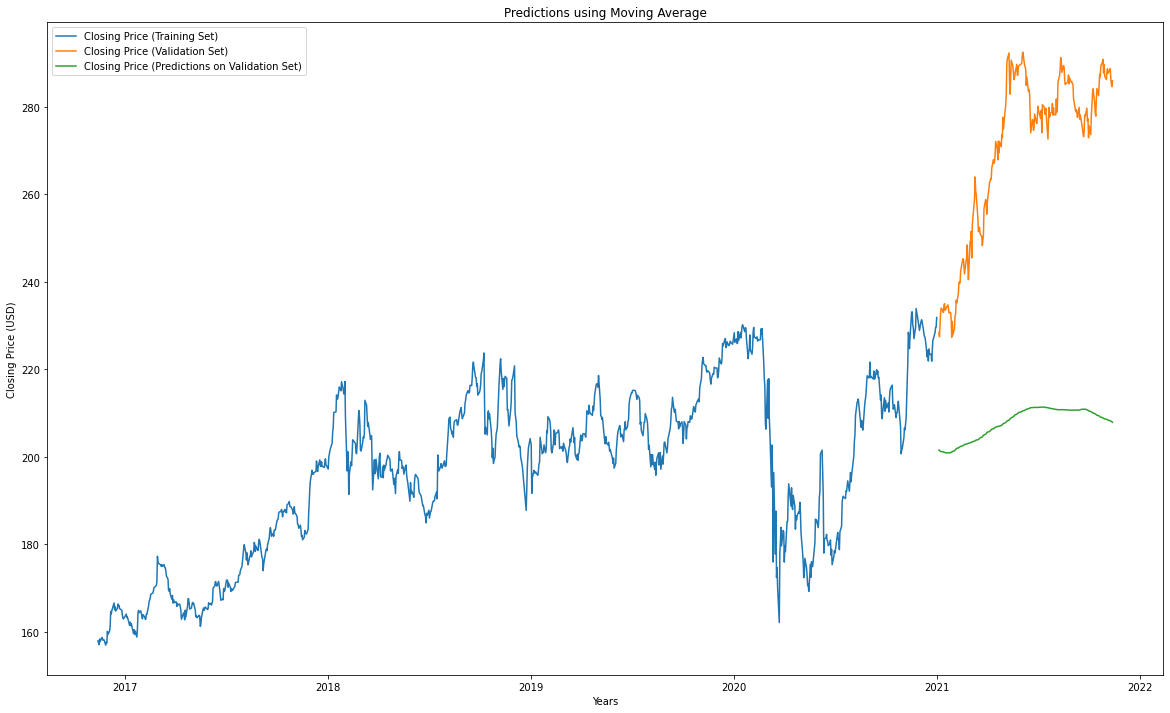

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
training.index = data['Date'][:1040]
validation.index = data['Date'][1040:]

validation['Predictions'] = 0
validation['Predictions'] = predictions

plt.figure(figsize = (20,12))
plt.plot(training['Close'], label = 'Closing Price (Training Set)')
plt.plot(validation['Close'], label = 'Closing Price (Validation Set)')
plt.plot(validation['Predictions'], label = 'Closing Price (Predictions on Validation Set)')
plt.title('Predictions using Moving Average')
plt.xlabel('Years')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()
plt.savefig('2.png')
files.download('2.png')

# **Technique 2: Linear Regression**

In [ ]:
temp = data.sort_index(ascending = True, axis = 0)
lr_data = pd.DataFrame(index = range(0, len(data)), columns = ['Date', 'Close'])

for i in range(0, len(temp)):
    lr_data['Date'][i] = temp['Date'][i]
    lr_data['Close'][i] = temp['Close'][i]

In [ ]:
from fastai.tabular import add_datepart
add_datepart(lr_data, 'Date')
lr_data.drop('Elapsed', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


In [ ]:
lr_data['mon_fri'] = 0
for i in range(0, len(lr_data)):
    if (lr_data['Dayofweek'][i] == 0 or lr_data['Dayofweek'][i] == 4):
        lr_data['mon_fri'][i] = 1
    else:
        lr_data['mon_fri'][i] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
training = lr_data[:1040]
validation = lr_data[1040:]

x_training = training.drop('Close', axis = 1)
y_training = training['Close']
x_validation = validation.drop('Close', axis = 1)
y_validation = validation['Close']

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_training, y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions = model.predict(x_validation)
rms = np.sqrt(np.mean(np.power((np.array(y_validation)-np.array(predictions)),2)))
print('\nRMSE (Validation set):')
print(rms)

performance_scores.loc[len(performance_scores.index)] = ['Linear Regression', rms]


RMSE (Validation set):
50.63619732621797


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


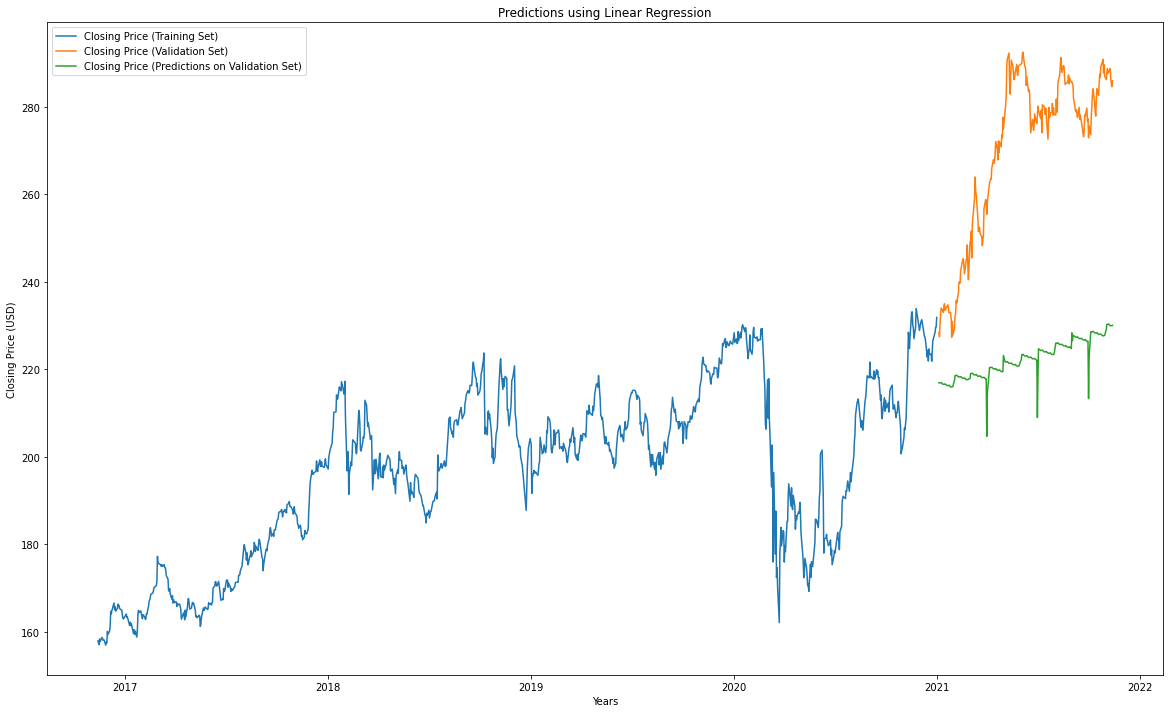

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
training.index = data['Date'][:1040]
validation.index = data['Date'][1040:]

validation['Predictions'] = 0
validation['Predictions'] = predictions

plt.figure(figsize = (20,12))
plt.plot(training['Close'], label = 'Closing Price (Training Set)')
plt.plot(validation['Close'], label = 'Closing Price (Validation Set)')
plt.plot(validation['Predictions'], label = 'Closing Price (Predictions on Validation Set)')
plt.title('Predictions using Linear Regression')
plt.xlabel('Years')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()
plt.savefig('3.png')
files.download('3.png')

# **Technique 3: k-Nearest Neighbours (KNN)**

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))

In [ ]:
x_training_scaled = scaler.fit_transform(x_training)
x_training = pd.DataFrame(x_training_scaled)
x_validation_scaled = scaler.fit_transform(x_validation)
x_validation = pd.DataFrame(x_validation_scaled)

parameters = {'n_neighbors' : [2,3,4,5,6,7,8,9]}
KNN = neighbors.KNeighborsRegressor()
model = GridSearchCV(KNN, parameters, cv = 5)

model.fit(x_training, y_training)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
predictions = model.predict(x_validation)
rms = np.sqrt(np.mean(np.power((np.array(y_validation)-np.array(predictions)), 2)))
print('\nRMSE (Validation set):')
print(rms)

performance_scores.loc[len(performance_scores.index)] = ['k-Nearest Neighbours', rms]


RMSE (Validation set):
99.76651715131152


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


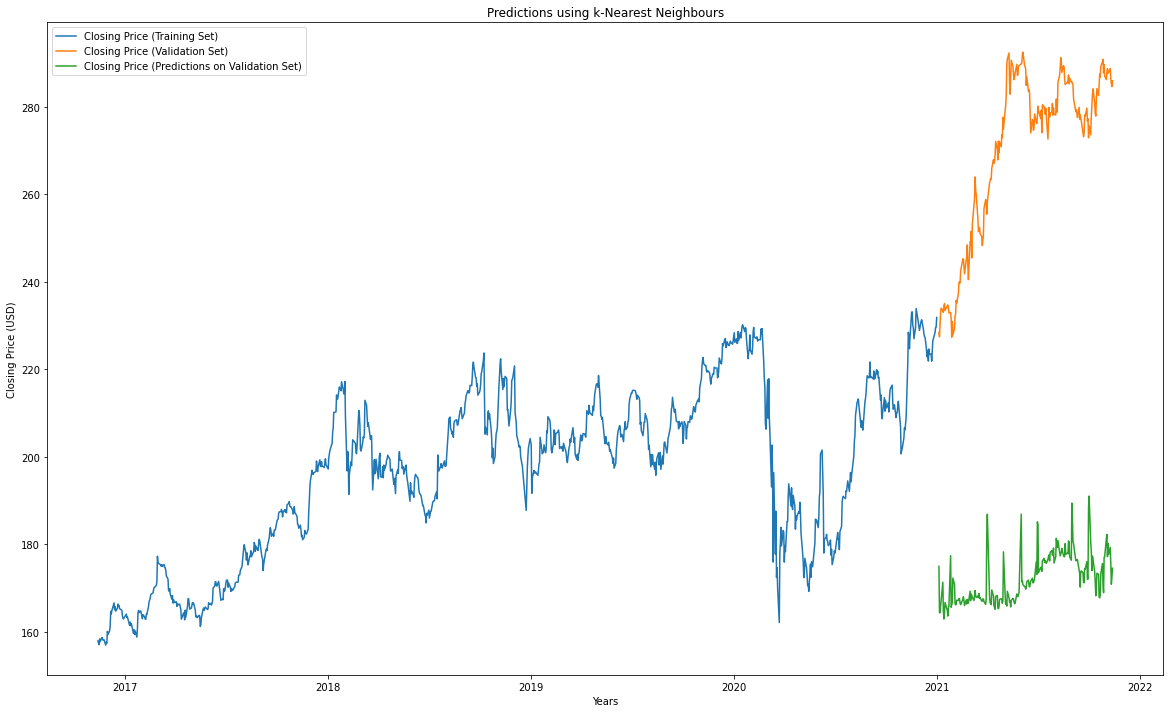

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
validation['Predictions'] = 0
validation['Predictions'] = predictions

training.index = data['Date'][:1040]
validation.index = data['Date'][1040:]

plt.figure(figsize = (20,12))
plt.plot(training['Close'], label = 'Closing Price (Training Set)')
plt.plot(validation['Close'], label = 'Closing Price (Validation Set)')
plt.plot(validation['Predictions'], label = 'Closing Price (Predictions on Validation Set)')
plt.title('Predictions using k-Nearest Neighbours')
plt.xlabel('Years')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()
plt.savefig('4.png')
files.download('4.png')

# **Technique 4: Auto ARIMA**

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

temp = data.sort_index(ascending = True, axis = 0)
train = temp[:1040]
valid = temp[1040:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods = 219)
forecast = pd.DataFrame(forecast, index = valid.index, columns = ['Predictions'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.43 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=5726.822, Time=0.08 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5454.796, Time=0.45 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.27 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=5713.465, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5296.152, Time=1.15 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.40 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.74 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5318.399, Time=0.80 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5290.215, Time=1.59 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=5444.536, Time=0.67 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=8.39 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=4.44 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=5292.191, Time=1.65 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=5292.2

In [ ]:
rms = np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Predictions'])), 2)))
print('\nRMSE (Validation set):')
print(rms)

performance_scores.loc[len(performance_scores.index)] = ['Auto ARIMA', rms]


RMSE (Validation set):
14.677147246175059


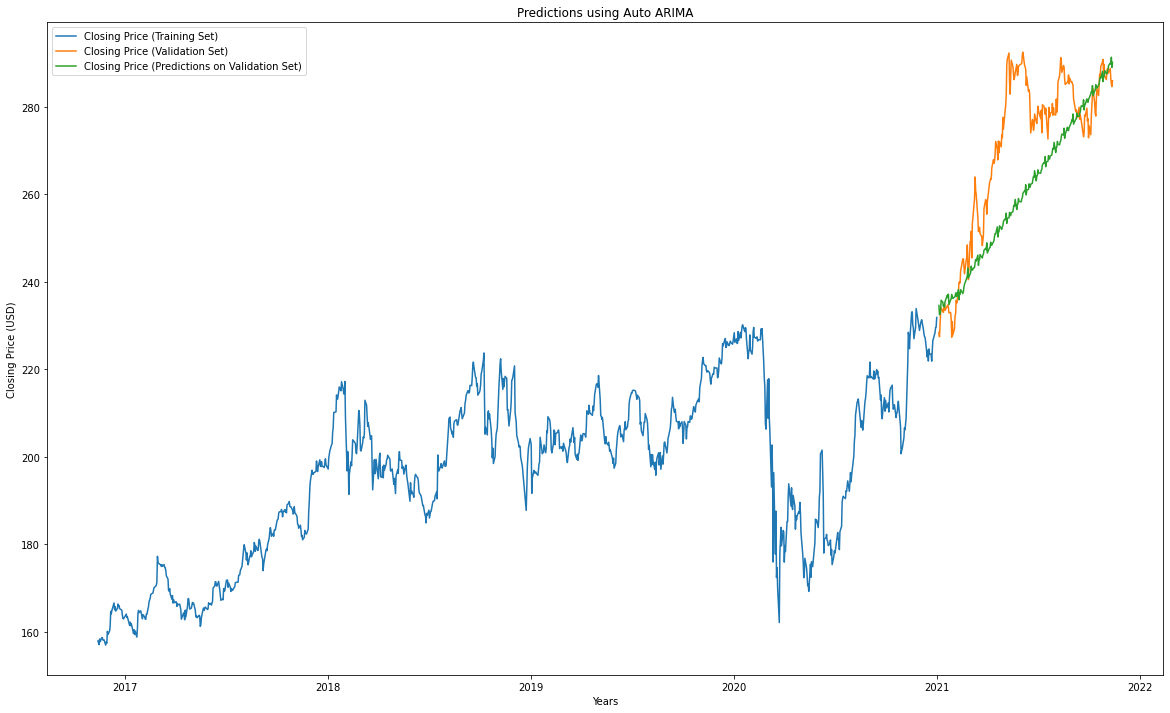

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize = (20,12))
plt.plot(train['Close'], label = 'Closing Price (Training Set)')
plt.plot(valid['Close'], label = 'Closing Price (Validation Set)')
plt.plot(forecast['Predictions'], label = 'Closing Price (Predictions on Validation Set)')
plt.title('Predictions using Auto ARIMA')
plt.xlabel('Years')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()
plt.savefig('5.png')
files.download('5.png')

# **Technique 5: Prophet**

In [ ]:
from fbprophet import Prophet

prophet_data = pd.DataFrame(index = range(0, len(data)), columns = ['Date', 'Close'])

for i in range(0, len(data)):
    prophet_data['Date'][i] = data['Date'][i]
    prophet_data['Close'][i] = data['Close'][i]

prophet_data['Date'] = pd.to_datetime(prophet_data.Date, format = '%Y-%m-%d')
prophet_data.index = prophet_data['Date']

prophet_data.rename(columns = {'Close': 'y', 'Date': 'ds'}, inplace = True)

training = prophet_data[:1040]
validation = prophet_data[1040:]

model = Prophet()
model.fit(training)

closing_prices = model.make_future_dataframe(periods = len(validation))
forecast = model.predict(closing_prices)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_validation = forecast['yhat'][1040:]
rms = np.sqrt(np.mean(np.power((np.array(validation['y'])-np.array(forecast_validation)), 2)))
print('\nRMSE (Validation set):')
print(rms)

performance_scores.loc[len(performance_scores.index)] = ['Prophet', rms]


RMSE (Validation set):
53.77768613976217


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



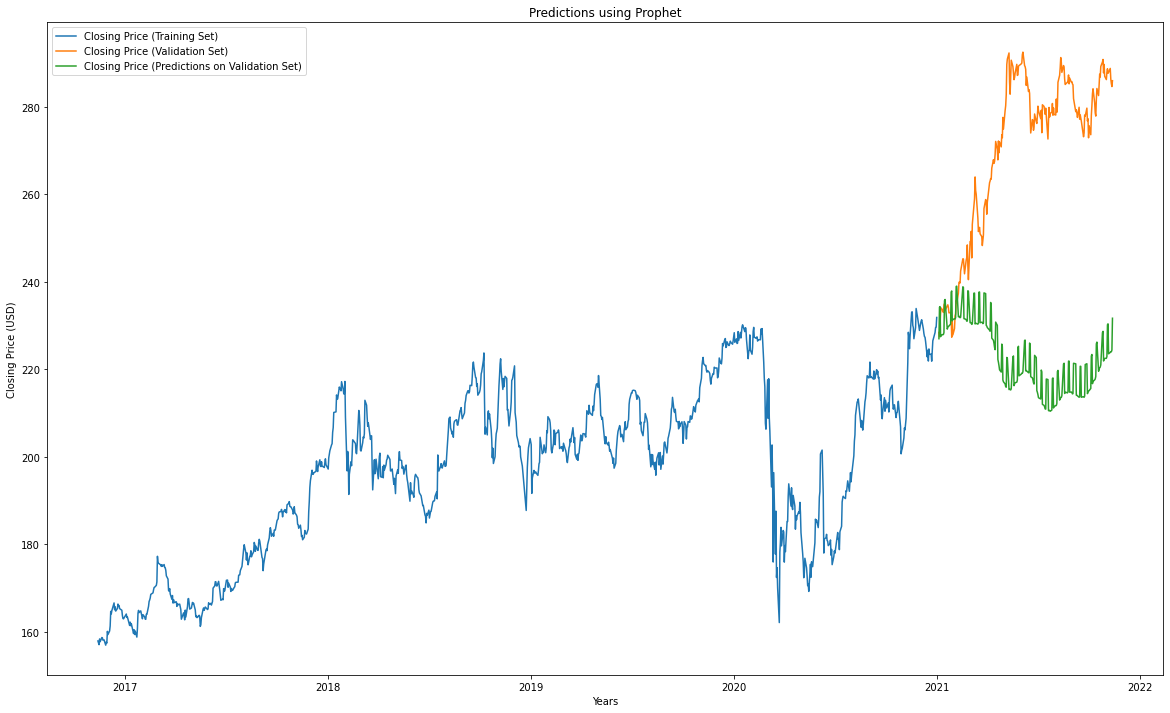

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
validation['Predictions'] = 0
validation['Predictions'] = forecast_validation.values

plt.figure(figsize = (20,12))
plt.plot(training['y'], label = 'Closing Price (Training Set)')
plt.plot(validation['y'], label = 'Closing Price (Validation Set)')
plt.plot(validation['Predictions'], label = 'Closing Price (Predictions on Validation Set)')
plt.title('Predictions using Prophet')
plt.xlabel('Years')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()
plt.savefig('6.png')
files.download('6.png')

# **Technique 6: Long Short Term Memory (LSTM)**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

temp = data.sort_index(ascending = True, axis = 0)
lstm_data = pd.DataFrame(index = range(0, len(data)), columns = ['Date', 'Close'])
for i in range(0, len(data)):
    lstm_data['Date'][i] = temp['Date'][i]
    lstm_data['Close'][i] = temp['Close'][i]

lstm_data.index = lstm_data.Date
lstm_data.drop('Date', axis = 1, inplace = True)

dataset = lstm_data.values
training = dataset[0:1040,:]
validation = dataset[1040:,:]

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_dataset = scaler.fit_transform(dataset)

x_training, y_training = [], []
for i in range(60, len(training)):
    x_training.append(scaled_dataset[i-60:i, 0])
    y_training.append(scaled_dataset[i,0])
x_training, y_training = np.array(x_training), np.array(y_training)

x_training = np.reshape(x_training, (x_training.shape[0], x_training.shape[1], 1))

model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_training.shape[1], 1)))
model.add(LSTM(units = 50))
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_training, y_training, epochs = 1, batch_size = 1, verbose = 2)

input = lstm_data[len(lstm_data) - len(validation) - 60:].values
input = input.reshape(-1,1)
input  = scaler.transform(input)

X_testing = []
for i in range(60, input.shape[0]):
    X_testing.append(input[i-60:i, 0])
X_testing = np.array(X_testing)

X_testing = np.reshape(X_testing, (X_testing.shape[0], X_testing.shape[1], 1))
closing_price = model.predict(X_testing)
closing_price = scaler.inverse_transform(closing_price)

980/980 - 27s - loss: 0.0022 - 27s/epoch - 28ms/step


In [ ]:
rms = np.sqrt(np.mean(np.power((validation - closing_price), 2)))
print('\nRMSE (Validation set):')
print(rms)

performance_scores.loc[len(performance_scores.index)] = ['Long Short Term Memory', rms]


RMSE (Validation set):
3.935778491845232


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



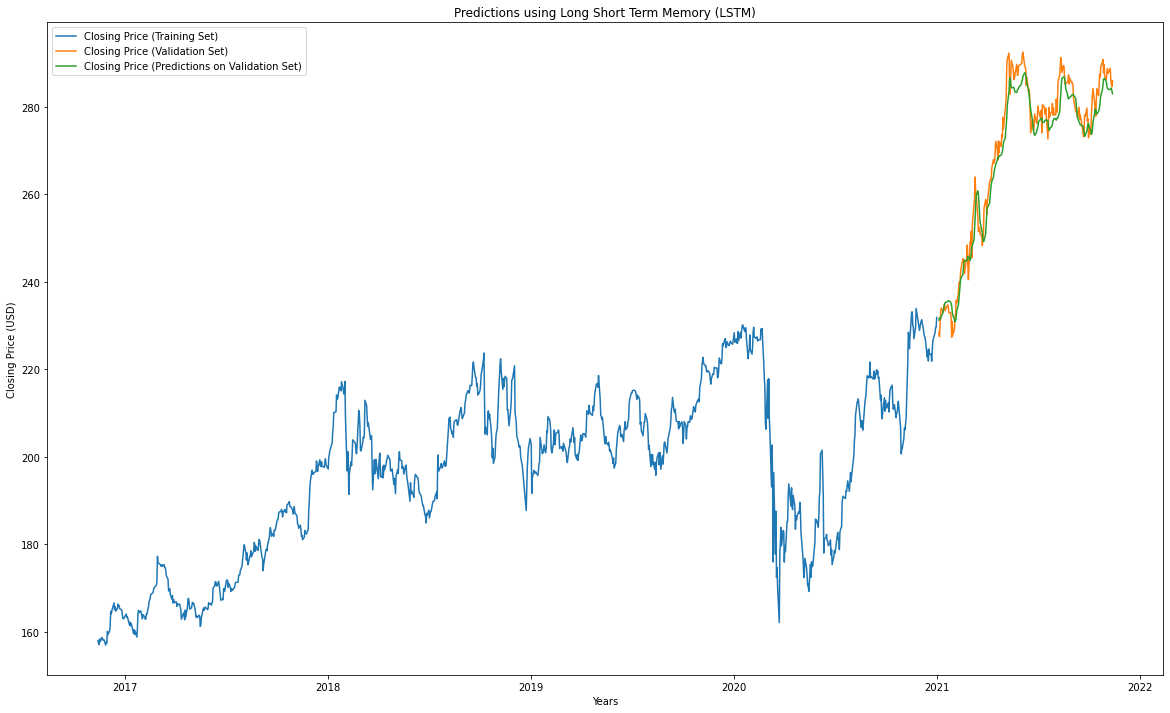

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize = (20,12))
training = lstm_data[:1040]
validation = lstm_data[1040:]
validation['Predictions'] = closing_price
plt.plot(training['Close'], label = 'Closing Price (Training Set)')
plt.plot(validation['Close'], label = 'Closing Price (Validation Set)')
plt.plot(validation['Predictions'], label = 'Closing Price (Predictions on Validation Set)')
plt.title('Predictions using Long Short Term Memory (LSTM)')
plt.xlabel('Years')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()
plt.savefig('7.png')
files.download('7.png')

# **Evaluating Performance using Statistical Test (Chi-squared Test)**
## **To test the goodness-of-fit of models.**

#### Hₒ: There is no significant difference in the performance of the algorithms.
#### Hₐ: There is a significant difference in the performance of the algorithms.

In [ ]:
performance_scores

,Algorithm,Performance
0,Moving Average,64.557861
1,Linear Regression,50.636197
2,k-Nearest Neighbours,99.766517
3,Auto ARIMA,14.677147
4,Prophet,53.777686
5,Long Short Term Memory,3.935778


In [ ]:
observed_values = np.array(performance_scores['Performance'])
expected_values = np.array([np.sum(observed_values)/6] * 6)

In [ ]:
from scipy.stats import chisquare

alpha = 0.05

result = chisquare(f_obs = observed_values, f_exp = expected_values)
chi_square_value = result[0]
p_value = result[1]
print(f'Chi-square value: {chi_square_value}\np-value: {p_value}')

Chi-square value: 126.24825285783061
p-value: 1.4875638451412125e-25


In [ ]:
if p_value <= alpha:
  print('There is a significant difference in the performance of the algorithms (reject the Null Hypothesis)')
else:
  print('There is no significant difference in the performance of the algorithms (fail to reject the Null Hypothesis)')

There is a significant difference in the performance of the algorithms (reject the Null Hypothesis)


## **Thus, we can conclude that the algorithm - Long Short Term Memory (LSTM) performs the best on the given dataset; as there is a significant difference in the performance of the algorithms and LSTM has the lowest RMSE value out of all the algorithms.**